### Import libraries and read data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data-for-plots/ml_models_performance_results.csv')

### Clean up architecture names for plot

In [5]:
# Clean up architecture names for plot
arch_map = {
    'VM': 'VM',
    'ECS_Private_IP': 'ECS 1-task (Priv IP)',
    'ECS_Public_IP': 'ECS 1-task (Pub IP)',
    'ECS_3Task_LoadBalanced': 'ECS 3-task LB'
}
df['Arch'] = df['Deployment_Architecture'].map(arch_map)

### Bar Plot: Median Response Time per Model, Grouped by Architecture

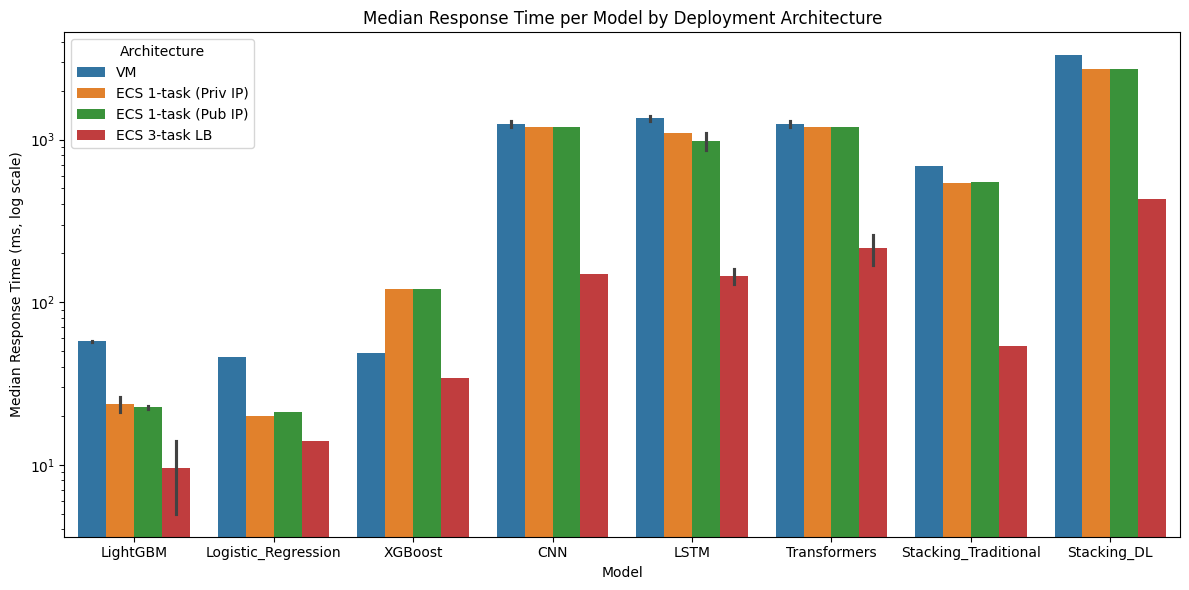

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Model_Name',
    y='Median_Response_Time_ms',
    hue='Arch'
)
plt.yscale('log')
plt.ylabel('Median Response Time (ms, log scale)')
plt.xlabel('Model')
plt.title('Median Response Time per Model by Deployment Architecture')
plt.legend(title='Architecture')
plt.tight_layout()
plt.show()

### Optional: Stacked Bar Plot – RPS by Model Type and Architecture

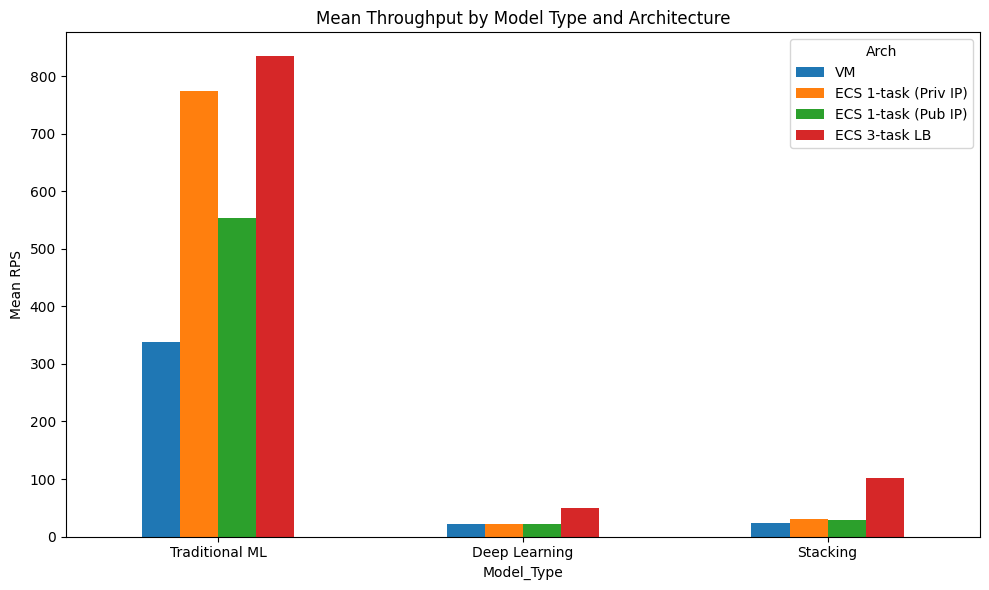

In [9]:
df['Model_Type'] = df['Model_Name'].replace({
    'Logistic_Regression': 'Traditional ML',
    'LightGBM': 'Traditional ML',
    'XGBoost': 'Traditional ML',
    'CNN': 'Deep Learning',
    'LSTM': 'Deep Learning',
    'Transformers': 'Deep Learning',
    'Stacking_Traditional': 'Stacking',
    'Stacking_DL': 'Stacking'
})
# Ensure the order of model types
model_type_order = ['Traditional ML', 'Deep Learning', 'Stacking']
arch_order = [
    'VM',
    'ECS 1-task (Priv IP)',
    'ECS 1-task (Pub IP)',
    'ECS 3-task LB'
]
# Create the pivot table
pivot = df.pivot_table(
    index='Model_Type',
    columns='Arch',
    values='Current_RPS',
    aggfunc='mean'
).reindex(index=model_type_order, columns=arch_order)

# Plot as grouped bars (not stacked)
pivot.plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6)
)

plt.ylabel('Mean RPS')
plt.title('Mean Throughput by Model Type and Architecture')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()